In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [7]:
trainset = torchvision.datasets.CIFAR10(root = './cifar10', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './cifar10', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False, num_workers = 2)

Files already downloaded and verified
Files already downloaded and verified


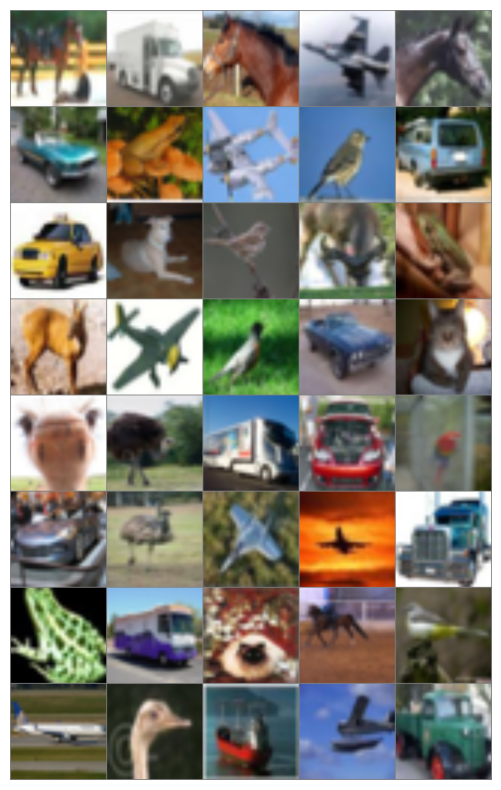

Labels: [7, 9, 7, 0, 7, 1, 6, 0, 2, 1, 1, 5, 2, 4, 6, 4, 0, 2, 1, 3, 2, 2, 9, 1, 2, 1, 2, 0, 0, 9, 6, 9, 3, 7, 2, 0, 2, 8, 0, 9]


In [17]:

data_iter = iter(trainloader)
images, labels = next(data_iter)

img_grid = torchvision.utils.make_grid(images[:40], nrow=5)

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

imshow(img_grid)
print("Labels:", labels[:40].tolist())


In [19]:
print("Classes:", trainset.classes)

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [23]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [61]:
class CustomAlexNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(CustomAlexNet, self).__init__()

        self.features = nn.Sequential(
            
            nn.Conv2d(3, 64, kernel_size = 11, stride = 4, padding = 2),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 3, stride = 2),

            nn.Conv2d(64, 192, kernel_size = 5, padding = 2),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 3, stride = 2),

            nn.Conv2d(192, 384, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),

            nn.Conv2d(384, 256, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),

            nn.Conv2d(256, 256, kernel_size = 3, padding = 1),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            
        )

        self.classifier = nn.Sequential(

            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 512),
            nn.ReLU(inplace = True),
            nn.Dropout(),
            nn.Linear(512, 128),
            nn.ReLU(inplace = True),
            nn.Linear(128, num_classes),
            
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [62]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

7255754

In [64]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [65]:

model = CustomAlexNet().to(device)
lossfunction = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001) 

In [ ]:
for _ in range(10):

    model.train()
    lossi = 0
    
    for images, labels in trainloader:
        
        images, labels = images.to(device), labels.to(device)    
        
        #forward pass
        outputs = model(images)
        loss = lossfunction(outputs, labels)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        lossi += loss.item()
    
    avg_loss = lossi / len(trainloader)
